[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/codebysumit/100-days-of-deep-learning-challenge/blob/master/Day%202/weights_calculation_of_Perceptron.ipynb)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

# Helper function

In [54]:
# W1*X + W2*Y + B = 0
def plot_decision_boundary(X, y, W1, W2, B, output_path = None):
    # Y = mX + b
    m = -(W1/W2)
    b = -(B/W2)

    # Get line
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    num_points = 100  # You can adjust the number of points as needed

    x_input = np.linspace(x_min, x_max , num_points)
    y_input = m*x_input + b

    # Create a scatter plot of sepal length vs sepal width
    plt.scatter(X[:, 0],  X[:, 1], c=y, cmap='viridis')
    plt.plot(x_input,y_input,color='red',linewidth=3)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal length (cm)')
    plt.title('Iris Dataset: Sepal Length vs Petal length')
    plt.colorbar(label='Species')

    # print(output_path != None)
    if output_path != None:
        plt.savefig(output_path, bbox_inches='tight', dpi=600)

    plt.show()

# def plot_decision_boundary(X, y, W1, W2, B, epoch, output_path=None):
#     # Y = mX + b
#     m = -(W1 / W2)
#     b = -(B / W2)

#     # Get line
#     x_min = X[:, 0].min()
#     x_max = X[:, 0].max()
#     num_points = 100

#     x_input = np.linspace(x_min, x_max, num_points)
#     y_input = m * x_input + b

#     # Create a scatter plot of sepal length vs sepal width
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
#     plt.plot(x_input, y_input, color='red', linewidth=3)
#     plt.xlabel('Sepal Length (cm)')
#     plt.ylabel('Petal length (cm)')
#     if epoch != None:
#       plt.title('Iris Dataset: Sepal Length vs Petal length')
#     else:
#       plt.title(f'No of epochs: {epoch}')
#     plt.colorbar(label='Species')

#     # -----------------------------------------------------------------
#     # FIX: Explicitly set axis limits
#     # -----------------------------------------------------------------

#     # Calculate the overall min/max for the data in X and Y
#     # You might want to slightly extend this range (e.g., add a margin)
#     x_data_min = X[:, 0].min()
#     x_data_max = X[:, 0].max()
#     y_data_min = X[:, 1].min()
#     y_data_max = X[:, 1].max()

#     # Add a small margin (e.g., 5%) to the data range
#     x_margin = (x_data_max - x_data_min) * 0.05
#     y_margin = (y_data_max - y_data_min) * 0.05

#     # Set the limits based on the data range plus a margin
#     plt.xlim(x_data_min - x_margin, x_data_max + x_margin)
#     plt.ylim(y_data_min - y_margin, y_data_max + y_margin)

#     # -----------------------------------------------------------------

#     if output_path != None:
#         plt.savefig(output_path, bbox_inches='tight', dpi=600)

#     plt.show()

In [5]:
def plot_perceptron_2f(perceptron, input_data, output_data, target_names, output_path = None):
  image = io.imread('https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiHUzRCe4QjlQqZiA6quDOLxCy_XJXotFmIJOWjIzYVeLJ9pOfcrp7hieQZrWB2aSLarMGMtACjF1aW89KxWfbQQH5X_IvydhZ5TnjShVLPyuz3c6MJ6EmA6Hz9-_UFdovFvQ6Z9RxJJZV1ItCZ3BiXMsk8YzLdvMl-KeNKxvevBSiWWDtWduIQ3jfMpA/s16000/template.png')
  plt.imshow(image)
  plt.axis('off')

  # Features Lable
  plt.text(46, 58, 'Sepal Length', color='#297d9e', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(46, 178, 'Petal Length', color='#297d9e', fontsize=10, fontweight='bold', ha='center', va='center')

  # Inputs Data
  plt.text(151, 58, f'{input_data[0]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(151, 178, f'{input_data[1]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')


  # Weights Data
  W = perceptron.coef_
  plt.text(246, 58, f'{W[0]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')
  plt.text(246, 178, f'{W[1]:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')

  # Bias Data
  B = perceptron.intercept_
  plt.text(246, 298, f'{B:.1f}', color='white', fontsize=10, fontweight='bold', ha='center', va='center')

  # Summation Unit
  plt.text(650, 10, f"$Z = ({W[0]:.1f} \\cdot {input_data[0]:.1f}) + ({W[1]:.1f} \\cdot {input_data[1]:.1f}) + ({B:.1f})$\n", color='black', fontsize=10, ha='center', va='center')

  sum = 0
  for i in range(2):
    sum += W[i] * input_data[i]
  sum += B

  plt.text(360, 110, f'$Z = {sum:.1f}$', color='black', fontsize=10, fontweight='bold', ha='center', va='center')

  # Stap Function
  y_hat = 1 if sum >= 0 else 0
  plt.text(500, 110, '$f(Z) = \\hat{y} = ' + str(y_hat) +'$', color='black', fontsize=10, fontweight='bold', ha='center', va='center')


  # Result
  predict = perceptron.predict(np.array([input_data]))[0]
  if predict == output_data:
    plt.text(600, 178, f'{predict}', color='#297d9e', fontsize=15, fontweight='bold', ha='center', va='center')
    plt.text(720, 178, f'({target_names[predict]})', color='#297d9e', fontsize=15, fontweight='bold', ha='center', va='center')

  if output_path != None:
    plt.savefig(output_path, bbox_inches='tight', dpi=600)
  plt.show()

 # Load the Iris dataset

In [6]:
iris = load_iris()

In [7]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['prediction'] = iris.target
iris_df = iris_df[iris_df.prediction != 2]

In [8]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),prediction
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


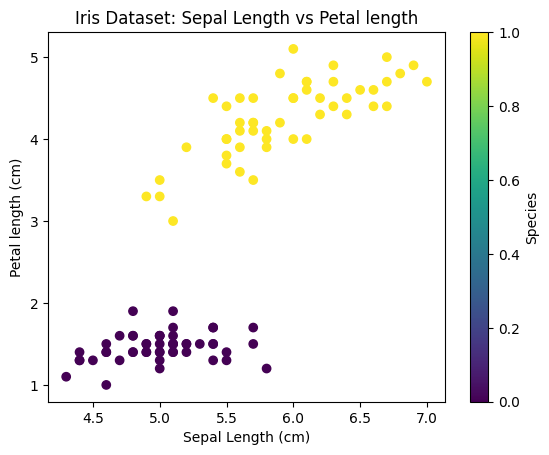

In [24]:
# Create a scatter plot of sepal length vs sepal width
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'], c=iris_df['prediction'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Iris Dataset: Sepal Length vs Petal length')
plt.colorbar(label='Species')
plt.show()

In [10]:
X=iris_df[['sepal length (cm)', 'petal length (cm)']].values
y=iris_df['prediction'].values

# Transformation

In [11]:
!ln -s /usr/local/share/jupyter/nbextensions /nbextensions
%cd /nbextensions

/usr/local/share/jupyter/nbextensions


In [12]:
%%html
<iframe src="https://www.desmos.com/calculator/8zttaweil3?embed" width="500" height="500" style="border: 1px solid #ccc" frameborder=0></iframe>

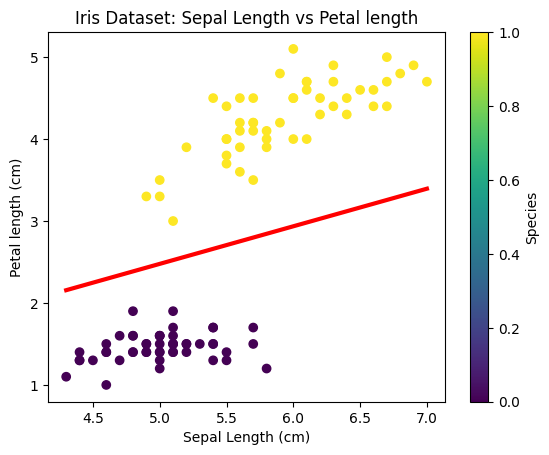

In [50]:
# Initial plot with the current weights
W1 = -5
W2 = 10.9
B = -2.0

# W1*X + W2*Y + B = 0
plot_decision_boundary(X, y, W1, W2, B, 4)

# Implementation of Perceptron

![Figure 1: Components of an AND Gate Perceptron with Step Function](https://share.google/0H74kKt8gO12eYMOd)
![qgovN.jpg](https://i.sstatic.net/qgovN.jpg)

In [145]:
def step(z):
  return 1 if z >= 0 else 0

In [146]:
def Perceptron(X, y, lr=0.1, epochs=1000):
  # add 1 at 0 column to provide biases value
  X = np.insert(X, 0, 1, axis=1)
  # initialise weights at 1
  weights = np.ones(X.shape[1])

  # loop in range 0 to epochs
  for i in range(epochs):
    # peek any random point at 0 to last index at X
    j = np.random.randint(0, X.shape[0])

    # make prediction
    z = np.dot(X[j], weights)
    y_hat = step(z)

    # Update weights
    weights = weights + lr*(y[j]-y_hat)*X[j]

  return weights[0], weights[1:]

Weights: [-2.3  4.4]
Bias: 0.0


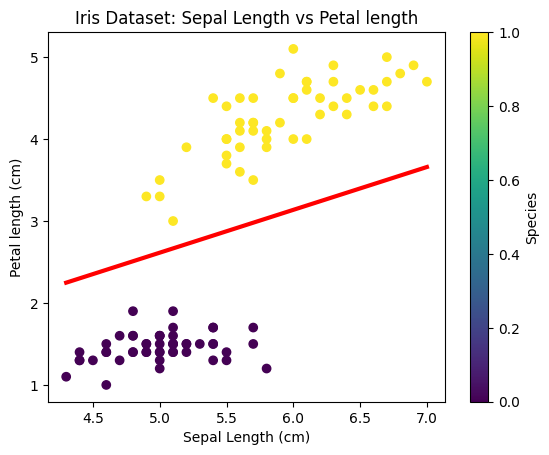

In [147]:
intercept_, coef_ = Perceptron(X, y, lr=0.5, epochs=80000)

print("Weights:", coef_)
print("Bias:", intercept_)

plot_decision_boundary(X, y, coef_[0], coef_[1], intercept_)

In [148]:
def predict(X, coef_, intercept_):
  arr = np.zeros(shape=(0,1), dtype=np.int8)
  ls = []
  for i in range(X.shape[0]):
    z = np.dot(X[i], coef_)
    y_hat = step(z)
    ls.append(y_hat)

  return np.append(arr,ls)

In [149]:
predict(X, coef_, intercept_)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

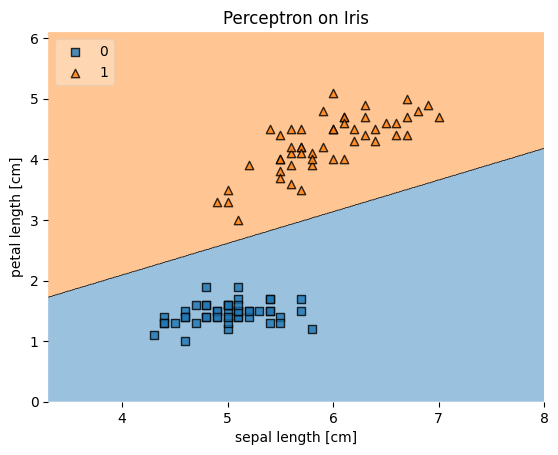

In [150]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Create a wrapper class with a predict method
class PerceptronWrapper:
    def __init__(self, coef, intercept):
        self.coef_ = coef
        self.intercept_ = intercept

    def predict(self, X):
        return predict(X, self.coef_, self.intercept_)

# Create an instance of the wrapper class
perceptron_clf = PerceptronWrapper(coef_, intercept_)

# Plotting decision regions
plot_decision_regions(X, y, clf=perceptron_clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron on Iris')
plt.show()

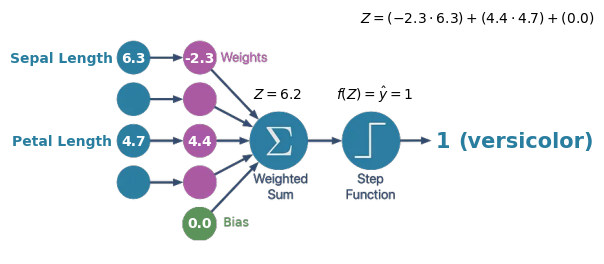

In [151]:
plot_perceptron_2f(perceptron_clf ,X[56], y[56], iris.target_names[:2])

# Imperceptron from Scratch (v2)

In [144]:
import random
import numpy as np

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

class Perceptron():

    def __init__(self,input_size = 2, lr = 0.01, epochs = 20):
        #setting default parameters
        self.lr = lr
        self.epochs = epochs
        self.input_size = input_size
        self.w = np.random.uniform(-1, 1, size=(input_size))
        self.bias = random.uniform(-1,1)
        self.misses = []

    def predict(self, X):
        # Ensure X is a numpy array
        X = np.asarray(X)
        z = sigmoid(np.dot(X, self.w) + self.bias)
        # Apply the step function threshold to each element in the array
        return (z > 0.5).astype(int)


    def fit(self, X, y):

        for epoch in range(self.epochs):
            miss = 0
            for yi, xi in zip(y, X):
                y_pred = self.predict(xi)
                #update the weights to minimize error
                error = yi - y_pred
                self.w += self.lr*error*xi
                self.bias += self.lr*error
                miss += int(error != 0.0)
            #get the number of missclassifications of each epoch
            self.misses.append(miss)

In [139]:
perceptron = Perceptron()
perceptron.fit(X,y)
print(perceptron.w, perceptron.bias)

[-0.3938226   0.58138836] 0.6466307656934964


In [140]:
print(perceptron.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


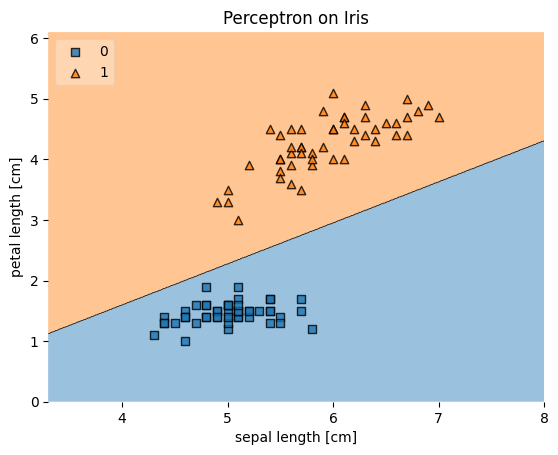

In [143]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Create an instance of the wrapper class
# perceptron_clf = perceptron(coef_, intercept_)

# Plotting decision regions
plot_decision_regions(X, y, clf=perceptron, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron on Iris')
plt.show()

# Save Training Vedio

In [152]:
# W1*X + W2*Y + B = 0

def plot_decision_boundary(X, y, W1, W2, B, epoch=None, output_path = None):
    # Y = mX + b
    m = -(W1/W2)
    b = -(B/W2)

    # Get line
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    num_points = 100  # You can adjust the number of points as needed

    x_input = np.linspace(x_min, x_max , num_points)
    y_input = m*x_input + b

    # Create a scatter plot of sepal length vs sepal width
    plt.scatter(X[:, 0],  X[:, 1], c=y, cmap='viridis')
    plt.plot(x_input,y_input,color='red',linewidth=3)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal length (cm)')
    if epoch != None:
      plt.title('Iris Dataset: Sepal Length vs Petal length')
    else:
      plt.title(f'No of epochs: {epoch}')
    plt.colorbar(label='Species')

    # print(output_path != None)
    if output_path != None:
        plt.savefig(output_path, bbox_inches='tight', dpi=600)

    plt.show()

In [153]:
def step(z):
  return 1 if z >= 0 else 0

In [ ]:
!rm -r '/content/training'
!mkdir '/content/training'

In [156]:
def Perceptron_plot(X, y, X_points, y_points, lr=0.1, epochs=1000):
  # add 1 at 0 column to provide biases value
  X = np.insert(X, 0, 1, axis=1)
  # initialise weights at 1
  weights = np.ones(X.shape[1])

  # loop in range 0 to epochs
  for i in range(epochs):
    # peek any random point at 0 to last index at X
    j = np.random.randint(0, X.shape[0])

    # make prediction
    z = np.dot(X[j], weights)
    y_hat = step(z)

    # Update weights
    weights = weights + lr*(y[j]-y_hat)*X[j]

    # ploat train graph
    plot_decision_boundary(X_points, y_points, weights[1:][0], weights[1:][1], weights[0], epoch=i, output_path = f'/content/training/{i}.png')


  return weights[0], weights[1:]

In [ ]:
intercept_, coef_ = Perceptron_plot(X, y, X_points=X, y_points=y, lr=0.1, epochs=100)

In [ ]:
print("Weights:", coef_)
print("Bias:", intercept_)

In [ ]:
import os
import cv2
from PIL import Image

In [ ]:
images_temp = []
for file in list(os.listdir('/content/training')):
  images_temp.append(os.path.join('/content/training', file))

In [ ]:
images = []
for i in range(len(images_temp)):
  images.append(os.path.join('/content/training', f'{i}.png'))

In [ ]:
images

In [ ]:
print('Total images:', len(images))

Total images: 105


In [ ]:
# Calculating the mean width and height of all images
mean_width = 0
mean_height = 0
num_of_images = len(images)

for file in images:
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        im = Image.open(file)
        width, height = im.size
        mean_width += width
        mean_height += height

# Averaging width and height
mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)

# Resizing all images to the mean width and height
for file in images: # Iterate through the list of image paths
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        im = Image.open(file) # Use the full file path
        # Use Image.LANCZOS instead of Image.ANTIALIAS for downsampling
        im_resized = im.resize((mean_width, mean_height), Image.Resampling.LANCZOS) # Corrected resampling filter
        im_resized.save(file, 'PNG') # Save as PNG since the input was PNG
        print(f"{file} is resized")

In [ ]:
# Function to generate video
def generate_video(images, output_dir):
    video_name = os.path.join(output_dir, 'a.avi')

    # print("Images:", images)

    # Set frame from the first image
    frame = cv2.imread(images[0])
    height, width, layers = frame.shape

    # Video writer to create .avi file
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'XVID'), 1, (width, height))

    # Appending images to video
    for image in images:
        video.write(cv2.imread(image))

    # Release the video file
    video.release()
    cv2.destroyAllWindows()
    print("Video generated successfully!")

# Calling the function to generate the video
generate_video(images, '/content/')

Video generated successfully!


In [ ]:
!ffmpeg -i "/content/a.avi" -c:v mpeg4 "/content/video.mp4"

In [ ]:
!ls -lh '/content/video.mp4'